In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
combined_data_first = mouse_drug_data.merge(clinical_trial_data, on="Mouse ID", how="outer")

# Display the data table for preview
print(combined_data_first.head())

cond = ((combined_data_first.Drug == "Capomulin") | (combined_data_first.Drug == "Infubinol") | (combined_data_first.Drug == "Ketapril") | (combined_data_first.Drug == "Placebo"))
combined_data = combined_data_first[cond]

combined_data

  Mouse ID      Drug  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     f234  Stelasyn          0           45.000000                 0
1     f234  Stelasyn          5           47.313491                 0
2     f234  Stelasyn         10           47.904324                 0
3     f234  Stelasyn         15           48.735197                 1
4     f234  Stelasyn         20           51.112713                 2


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0
398,n923,Ketapril,10,48.791950,1
399,n923,Ketapril,15,51.738706,1
400,n923,Ketapril,20,52.599206,1
401,n923,Ketapril,25,56.855465,2
402,n923,Ketapril,30,59.632561,3


In [2]:
#Get drug names in order
drug_names = combined_data.groupby("Drug").count().index.values

## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
growth_data = combined_data.groupby(["Drug","Timepoint"]).agg({
    "Tumor Volume (mm3)":"mean"
})

# Convert to DataFrame
growth_data = growth_data.reset_index()

# Preview DataFrame
growth_data.head(20)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


growth_data_test = growth_data.copy()


test = growth_data_test.groupby("Timepoint").agg({
    "Tumor Volume (mm3)":("mean","std","sem")
})

test.columns = test.columns.map("_".join)
test.columns = ["Tumor Volume","Standard Deviation","Standard Error"]

plt.errorbar(test.index, growth_data["Tumor Volume"], yerr=test['Standard Deviation'],)
plt.show()

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
growth_data_error = combined_data.groupby(["Drug","Timepoint"]).agg({
    "Tumor Volume (mm3)":"sem"
})

growth_data_error = growth_data_error.reset_index()
growth_data_error = growth_data_error.rename(columns={"Tumor Volume (mm3)":"Standard Error"})

# Preview DataFrame
growth_data_error.head(20)

,Drug,Timepoint,Standard Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [5]:
# Minor Data Munging to Re-Format the Data Frames
drug_compare = pd.DataFrame()
counter = 0
div = 10
lim = len(growth_data) // div
samples = [growth_data.iloc[(i * div):(i * div + div), 2] for i in range(0, lim)]

for x in samples:
    drug_compare[f"{drug_names[counter]}"] = list(x)
    counter += 1

# Preview that Reformatting worked
drug_compare = drug_compare.set_index(np.arange(0, 50, 5))
drug_compare

,Capomulin,Infubinol,Ketapril,Placebo
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675
45,36.236114,65.755562,70.662958,68.084082


In [6]:
# Minor Data Munging to Re-Format the Data Frames
drug_compare_error = pd.DataFrame()
counter = 0
div = 10
lim = len(growth_data_error) // div
samples = [growth_data_error.iloc[(i * div):(i * div + div), 2] for i in range(0, lim)]

for x in samples:
    drug_compare_error[f"{drug_names[counter]}"] = list(x)
    counter += 1

# Preview that Reformatting worked
drug_compare_error = drug_compare_error.set_index(np.arange(0, 50, 5))
drug_compare_error

,Capomulin,Infubinol,Ketapril,Placebo
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634
45,1.223977,1.144427,1.453186,1.351726


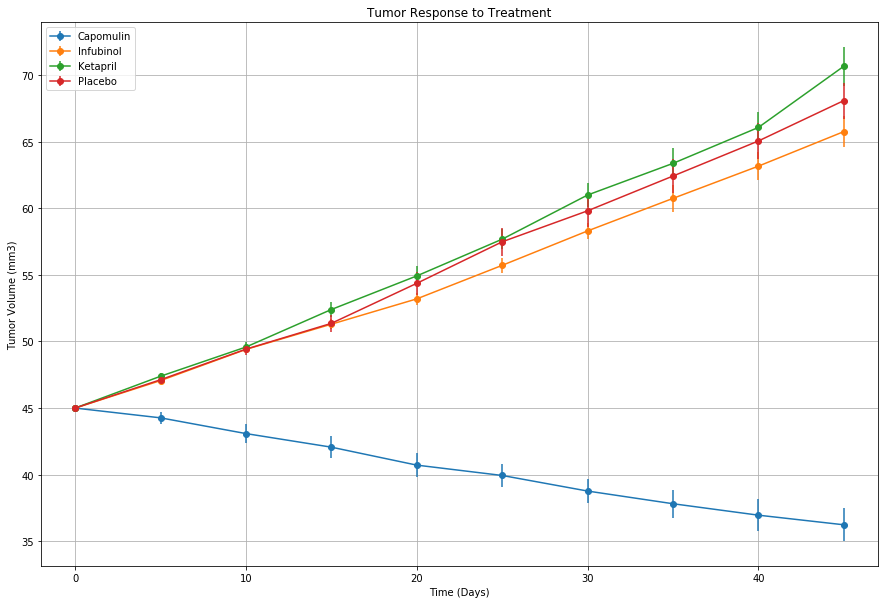

In [7]:
# Generate the Plot (with Error Bars)


#plt.plot(drug_compare.index.values,drug_compare,marker="o")
drug_compare.plot(yerr=drug_compare_error,figsize=(15,10),marker="o")
plt.grid()
plt.xlim(-2,47)
plt.legend(drug_compare.columns,loc="upper left")
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.savefig('tumor_response.png')
plt.show()


# Save the Figure



## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
growth_sites = combined_data.groupby(["Drug","Timepoint"]).agg({
    "Metastatic Sites":"mean"
})

# Convert to DataFrame
growth_sites = growth_sites.reset_index()

# Preview DataFrame
growth_sites.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
growth_sites_error = combined_data.groupby(["Drug","Timepoint"]).agg({
    "Metastatic Sites":"sem"
})

# Convert to DataFrame
growth_sites_error = growth_sites_error.reset_index()

# Preview DataFrame
growth_sites_error.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames
drug_compare_sites = pd.DataFrame()
counter = 0
div = 10
lim = len(growth_sites) // div
samples = [growth_sites.iloc[(i * div):(i * div + div), 2] for i in range(0, lim)]

for x in samples:
    drug_compare_sites[f"{drug_names[counter]}"] = list(x)
    counter += 1

# Preview that Reformatting worked
drug_compare_sites = drug_compare_sites.set_index(np.arange(0, 50, 5))
drug_compare_sites

,Capomulin,Infubinol,Ketapril,Placebo
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667
45,1.476190,2.111111,3.363636,3.272727


In [11]:
# Minor Data Munging to Re-Format the Data Frames
drug_compare_sites_error = pd.DataFrame()
counter = 0
div = 10
lim = len(growth_sites_error) // div
samples = [growth_sites_error.iloc[(i * div):(i * div + div), 2] for i in range(0, lim)]

for x in samples:
    drug_compare_sites_error[f"{drug_names[counter]}"] = list(x)
    counter += 1

# Preview that Reformatting worked
drug_compare_sites_error = drug_compare_sites_error.set_index(np.arange(0, 50, 5))
drug_compare_sites_error

,Capomulin,Infubinol,Ketapril,Placebo
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294
45,0.202591,0.309320,0.278722,0.304240


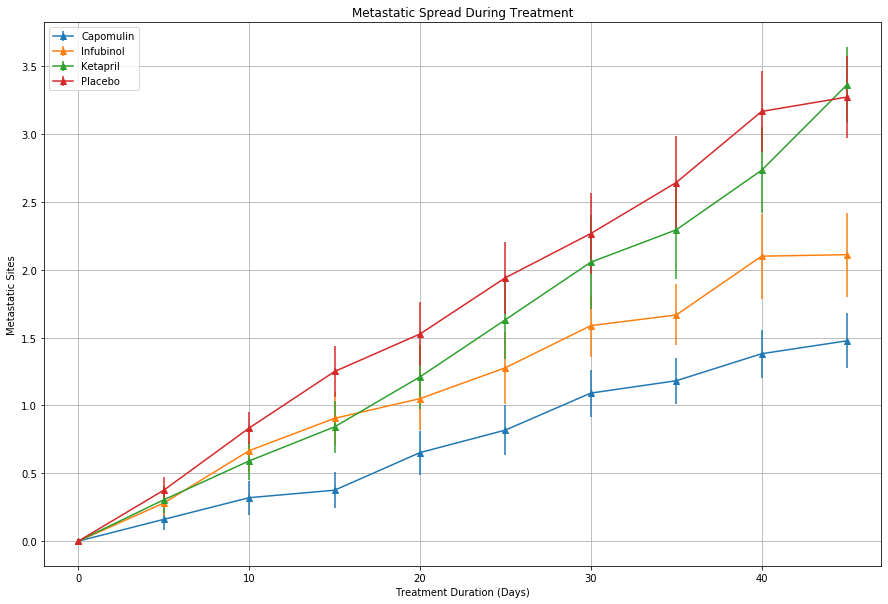

In [12]:
# Generate the Plot (with Error Bars)


drug_compare_sites.plot(yerr=drug_compare_sites_error,figsize=(15,10),marker="^")
plt.grid()
plt.xlim(-2,47)
plt.legend(drug_compare.columns,loc="upper left")
plt.title("Metastatic Spread During Treatment")
plt.ylabel("Metastatic Sites")
plt.xlabel("Treatment Duration (Days)")
plt.savefig('metastatic_spread.png')
plt.show()


## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survivor_data = combined_data.groupby(["Drug","Timepoint"]).agg({
    "Mouse ID":"count"
})


# Convert to DataFrame
survivor_data = survivor_data.reset_index()

# Preview DataFrame
survivor_data.head(20)

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [14]:
# Minor Data Munging to Re-Format the Data Frames
survivors_by_drug = pd.DataFrame()
survivors_by_drug_percent = pd.DataFrame()
counter = 0
div = 10
lim = len(survivor_data) // div
samples = [survivor_data.iloc[(i * div):(i * div + div), 2] for i in range(0, lim)]

for x in samples:
    survivors_by_drug[f"{drug_names[counter]}"] = list(x)
    survivors_by_drug_percent[f"{drug_names[counter]}"] = list(round((x / list(x)[0]) * 100,1))
    counter += 1

# Preview that Reformatting worked
survivors_by_drug = survivors_by_drug.set_index(np.arange(0, 50, 5))
survivors_by_drug

,Capomulin,Infubinol,Ketapril,Placebo
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12
45,21,9,11,11


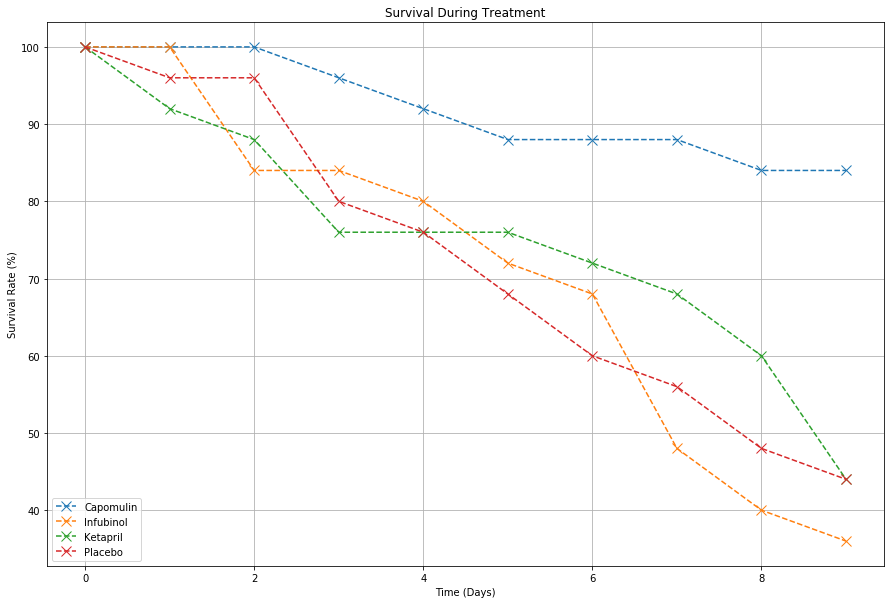

In [15]:
# Generate the Plot (Accounting for percentages)

plt.figure(figsize=(15,10))
plt.plot(survivors_by_drug_percent.index.values,survivors_by_drug_percent,"x--",markersize=10)
plt.grid()
plt.legend(drug_compare.columns,loc="lower left")
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.savefig('survival_data.png')
plt.show()

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
changes = []
names = []
counter = 0

for columns in drug_compare:
    temp_list = list(drug_compare[columns])
    change = ((temp_list[9] - temp_list[0]) / temp_list[0]) * 100
    names.append(drug_compare.columns[counter])
    changes.append(change)
    counter += 1

# Display the data to confirm
percent_changes = pd.DataFrame()
percent_changes["Drug"] = names
percent_changes["Percent Change"] = changes

percent_changes

,Drug,Percent Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


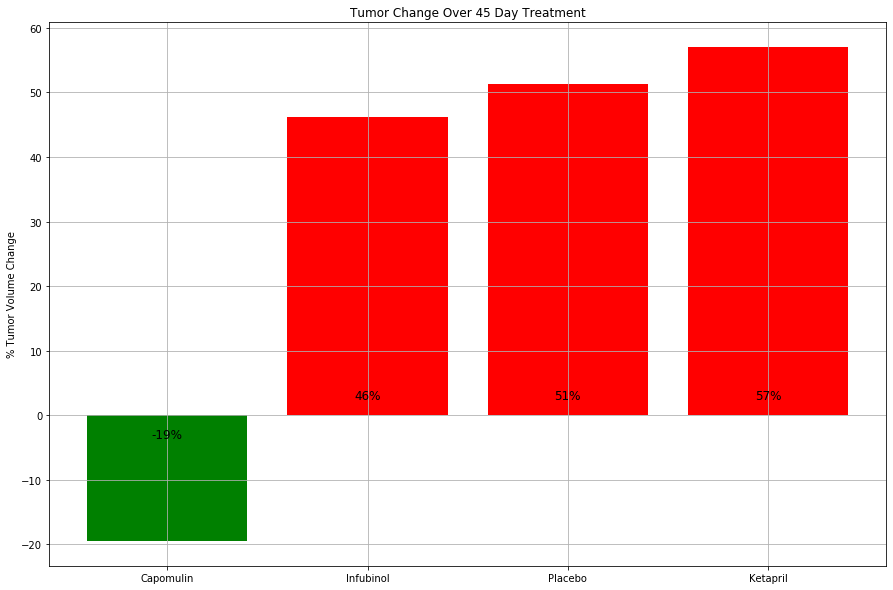

In [17]:
# Store all Relevant Percent Changes into a Tuple
percent_changes_sorted = percent_changes.sort_values("Percent Change").reset_index(drop=True)

# Splice the data between passing and failing drugs
good_drugs_list = percent_changes_sorted.iloc[:1, :]
fail_drugs_list = percent_changes_sorted.iloc[1:, :]

# Orient widths. Add labels, tick marks, etc. 

good_drugs = good_drugs_list["Drug"]
fail_drugs = fail_drugs_list["Drug"]
x_axis_good = np.arange(len(good_drugs_list))
x_axis_fail = np.arange(len(good_drugs_list),len(fail_drugs_list)+len(good_drugs_list),1)

# Use functions to label the percentages of changes
plt.figure(figsize=(15,10))
x = plt.bar(x_axis_good, good_drugs_list["Percent Change"], color='g', align="center")
y = plt.bar(x_axis_fail, fail_drugs_list["Percent Change"], color='r', align="center")

# Call functions to implement the function calls
tick_locations = [value for value in np.arange(len(percent_changes_sorted))]
plt.xticks(tick_locations, percent_changes_sorted["Drug"])
plt.grid()
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

def label_bars(bars):

    for bar in bars:
        height = bar.get_height()
        if height < 0:
            va = "top"
            adj = -2
        else:
            va = "bottom"
            adj = 2
        plt.text(bar.get_x() + bar.get_width()/2, adj, str(int(round(height,0)))+"%", ha='center', va=va,fontsize=12)
# Save the Figure
label_bars(x)
label_bars(y)
plt.savefig('summary_data.png')

# Show the Figure
plt.show()